In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
from mldec.hardware.topological_codes.postprocessing import reshape_and_verify_correspondence
from mldec.datasets.reps_exp_rep_code_data import build_syndrome_2D, make_exp_dataset_name, load_data

import numpy as np


### Load data and look at syndrome distr by weight

In [6]:
def make_visualization_by_round(X):
    """Make a histogram of the (weights) of (modded) syndromes in the experimental data.
    
    X has shape (n_data, repetitions, n-1). """

    out = np.zeros(X.shape[2] + 1)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            out[int(np.sum(X[i, j]))] += 1
    return out / np.sum(out)

In [10]:
X.shape

(512, 6, 4)

Text(0.5, 1.0, 'Histogram of syndrome weights')

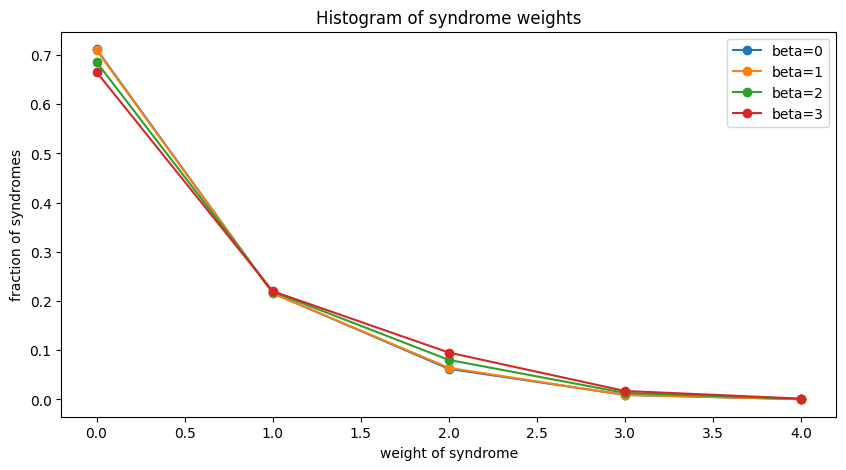

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

delay_factors = [0, 1, 2, 3]
n = 5
T = 6

# load the data
out = {}
for delay_factor in delay_factors:
    fname = make_exp_dataset_name(n, T, delay_factor)
    X, y = load_data(fname)
    out[delay_factor] = (X, y)


for beta, (X, y) in out.items():
    syndromes = np.array([build_syndrome_2D(X[i,:,:]) for i in range(X.shape[0])])
    syndromes = syndromes.reshape(X.shape)
    hist = make_visualization_by_round(syndromes)
    ax.plot(range(len(hist)), hist, label=f"beta={beta}", marker="o")
    
ax.legend()
ax.set_xlabel("weight of syndrome")
ax.set_ylabel("fraction of syndromes")
ax.set_title("Histogram of syndrome weights")
# ax.semilogy()
